# Versionamiento de modelos

Los modelos probados y entrenados fueron diseñados y actualizados

In [1]:
from tensorflow.keras.models import load_model
import mlflow
import mlflow.keras
from mlflow.tracking import MlflowClient

In [2]:
modelEFNet1 = 'models/modelEfficientNet1.keras'
modelEFNet2 = 'models/modelEfficientNet2.keras'
modelVGG161 = 'models/modelVGG161.keras'
modelVGG162 = 'models/modelVGG162.keras'
finalModel = 'models/finalModel.keras'

In [23]:
def register_model(path, model_name):
    model = load_model(path)

    print("Model information: ",model)
    mlflow.set_tracking_uri("http://127.0.0.1:5000/")

    model_params = {
        "num_layers": len(model.layers),
        "loss_function": str(model.loss),
        "metrics": [str(metric) for metric in model.metrics],
        "optimizer_config": model.optimizer.get_config(),
        "input_shape": str(model.input_shape),
        "output_shape": str(model.output_shape),
        "layer_configs": [layer.get_config() for layer in model.layers],
        "layer_weights": [layer.get_weights() for layer in model.layers]
    }

    # Registrar el modelo desde el archivo o directorio
    with mlflow.start_run() as run:
        # Guardar el modelo en MLflow como un artifact
        modelo_uri = mlflow.keras.log_model(model, artifact_path="modelo_keras")
        
        # Obtener la URI del modelo registrado
        modelo_uri = f"runs:/{mlflow.active_run().info.run_id}/modelo_keras"

        # Log params

        mlflow.log_param("num_layers", model_params["num_layers"])
        mlflow.log_param("loss_function", model_params["loss_function"])
        mlflow.log_param("metrics", model_params["metrics"])
        mlflow.log_param("optimizer_config", model_params["optimizer_config"])
        mlflow.log_param("input_shape", model_params["input_shape"])
        mlflow.log_param("num_layers", model_params["num_layers"])

        with open("model_layer_configs.txt", "w") as f:
            f.write(str(model_params["layer_configs"]))
        mlflow.log_artifact("model_layer_configs.txt")

        with open("model_layer_weights.txt", "w") as f:
            f.write(str(model_params["layer_weights"]))
        mlflow.log_artifact("model_layer_weights.txt")

    # Usar el cliente para registrar el modelo
    client = MlflowClient()

    try:
        registered_model = client.get_registered_model(model_name)
        print(f"El modelo '{model_name}' ya está registrado. Creando una nueva versión.")
    except Exception as e:
        print(f"El modelo '{model_name}' no está registrado. Registrándolo por primera vez.")
        client.create_registered_model(model_name)

    # Crear una nueva versión del modelo en el registro
    model_version = client.create_model_version(
        name=model_name,
        source=modelo_uri,
        run_id=run.info.run_id
    )

    print(f"Modelo '{model_name}' registrado con éxito. Versión: {model_version.version}")


In [24]:
register_model(modelEFNet1, "Efficient Net")

Model information:  <Functional name=functional, built=True>


2024/12/19 17:29:28 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/19 17:29:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/19 17:29:42 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Efficient Net, version 1


🏃 View run bald-skink-856 at: http://127.0.0.1:5000/#/experiments/0/runs/4d2484295f3e48bab7642fb3f67d2b6c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0
El modelo 'Efficient Net' no está registrado. Registrándolo por primera vez.
Modelo 'Efficient Net' registrado con éxito. Versión: 1


#### Experimento realizado (información y parámetros)

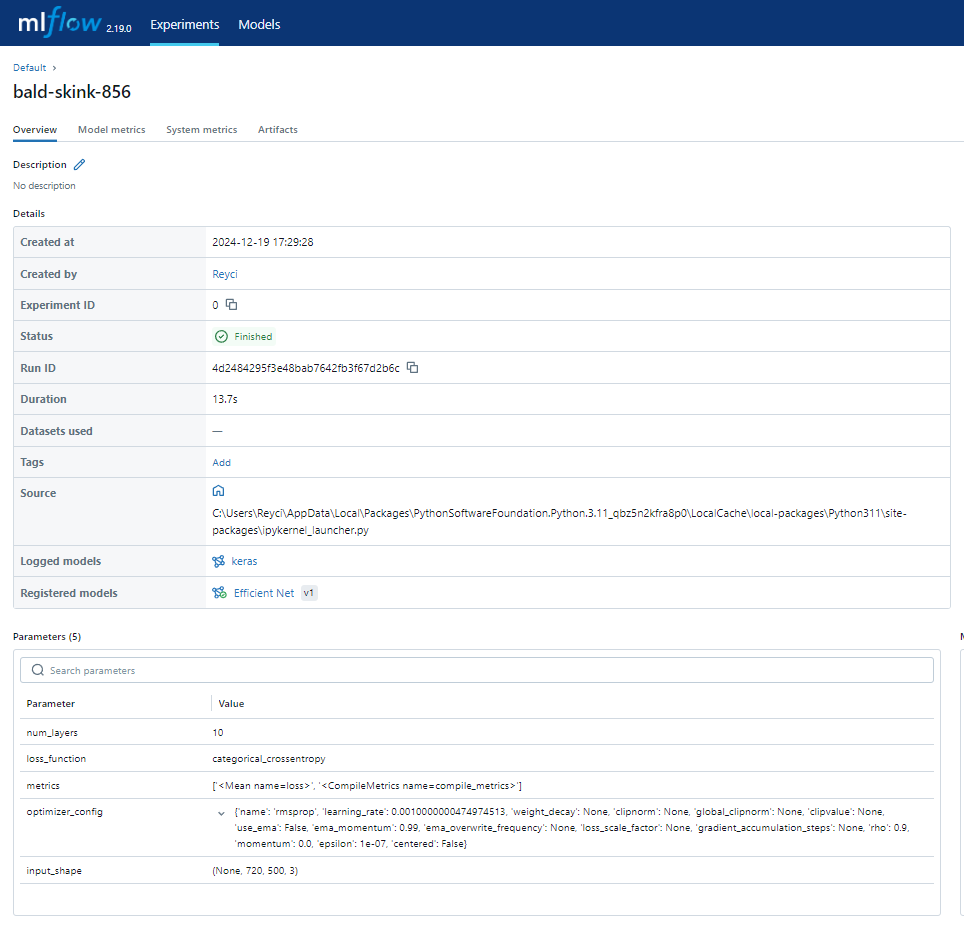

#### Artefactos asociados (hiperparámetros)

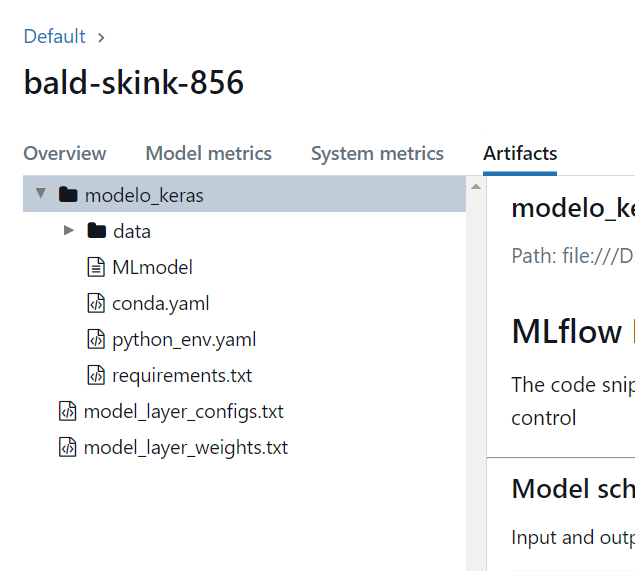

In [25]:
register_model(modelEFNet2, "Efficient Net")

Model information:  <Functional name=functional, built=True>


2024/12/19 17:29:47 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/19 17:30:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/19 17:30:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Efficient Net, version 2


🏃 View run luminous-mare-291 at: http://127.0.0.1:5000/#/experiments/0/runs/9d866b9978a243149281731f8e9fbacc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0
El modelo 'Efficient Net' ya está registrado. Creando una nueva versión.
Modelo 'Efficient Net' registrado con éxito. Versión: 2


#### Experimento realizado (información y parámetros)

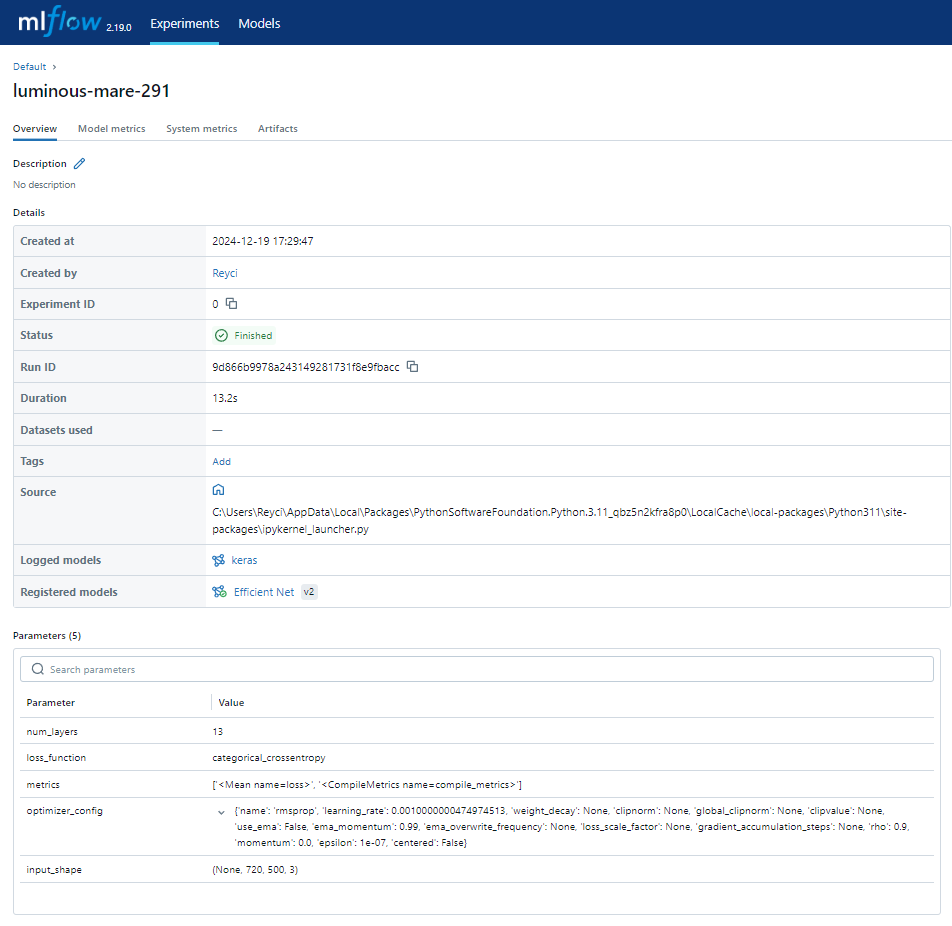

#### Artefactos asociados (hiperparámetros)

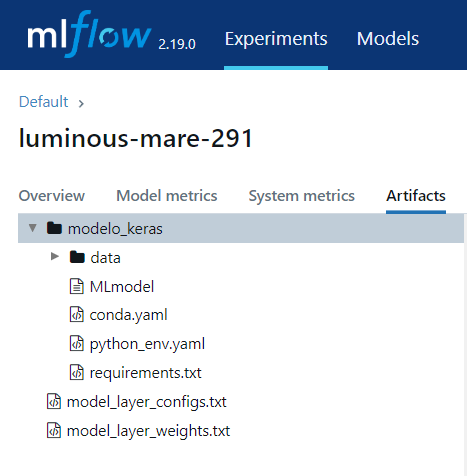


In [26]:
register_model(modelVGG161, "VGG 16")

2024/12/19 17:30:04 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


Model information:  <Functional name=functional, built=True>


2024/12/19 17:30:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/19 17:30:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: VGG 16, version 1


🏃 View run skittish-penguin-250 at: http://127.0.0.1:5000/#/experiments/0/runs/815a3b9dc7d846f7adece54bd7b953a2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0
El modelo 'VGG 16' no está registrado. Registrándolo por primera vez.
Modelo 'VGG 16' registrado con éxito. Versión: 1


#### Experimento realizado (información y parámetros)

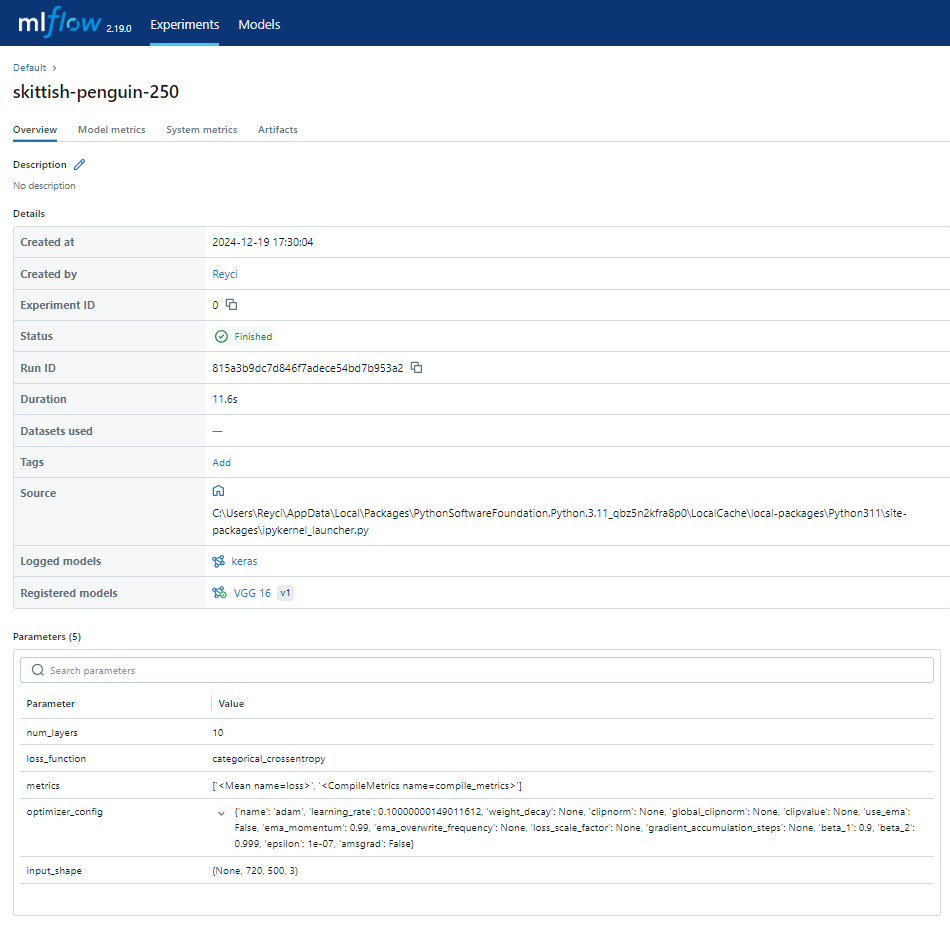

#### Artefactos asociados (hiperparámetros)

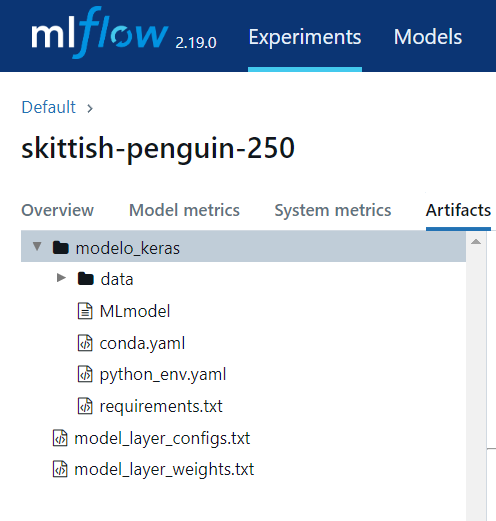

In [27]:
register_model(modelVGG162, "VGG 16")

2024/12/19 17:30:20 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


Model information:  <Functional name=functional, built=True>


2024/12/19 17:30:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/19 17:30:30 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: VGG 16, version 2


🏃 View run luminous-seal-129 at: http://127.0.0.1:5000/#/experiments/0/runs/474f01bdf15b43d7ab0376cc967d30ab
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0
El modelo 'VGG 16' ya está registrado. Creando una nueva versión.
Modelo 'VGG 16' registrado con éxito. Versión: 2


#### Experimento realizado (información y parámetros)

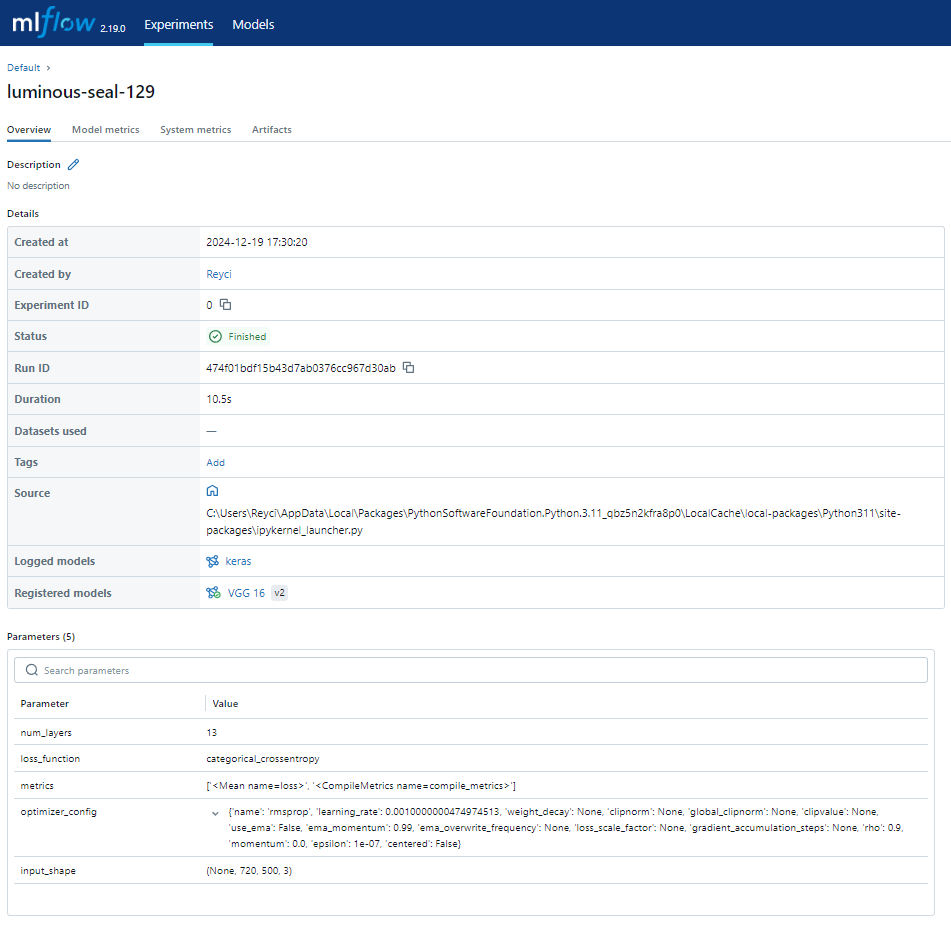

#### Artefactos asociados (hiperparámetros)

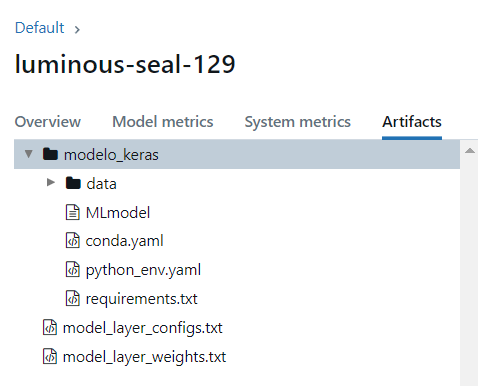

In [28]:
register_model(finalModel, "Final model")

2024/12/19 17:30:33 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


Model information:  <Functional name=functional, built=True>


2024/12/19 17:30:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/19 17:30:43 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Final model, version 1


🏃 View run silent-calf-208 at: http://127.0.0.1:5000/#/experiments/0/runs/23a33fd1c54b4a8ab2044b8eea26666a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0
El modelo 'Final model' no está registrado. Registrándolo por primera vez.
Modelo 'Final model' registrado con éxito. Versión: 1


#### Experimento realizado (información y parámetros)

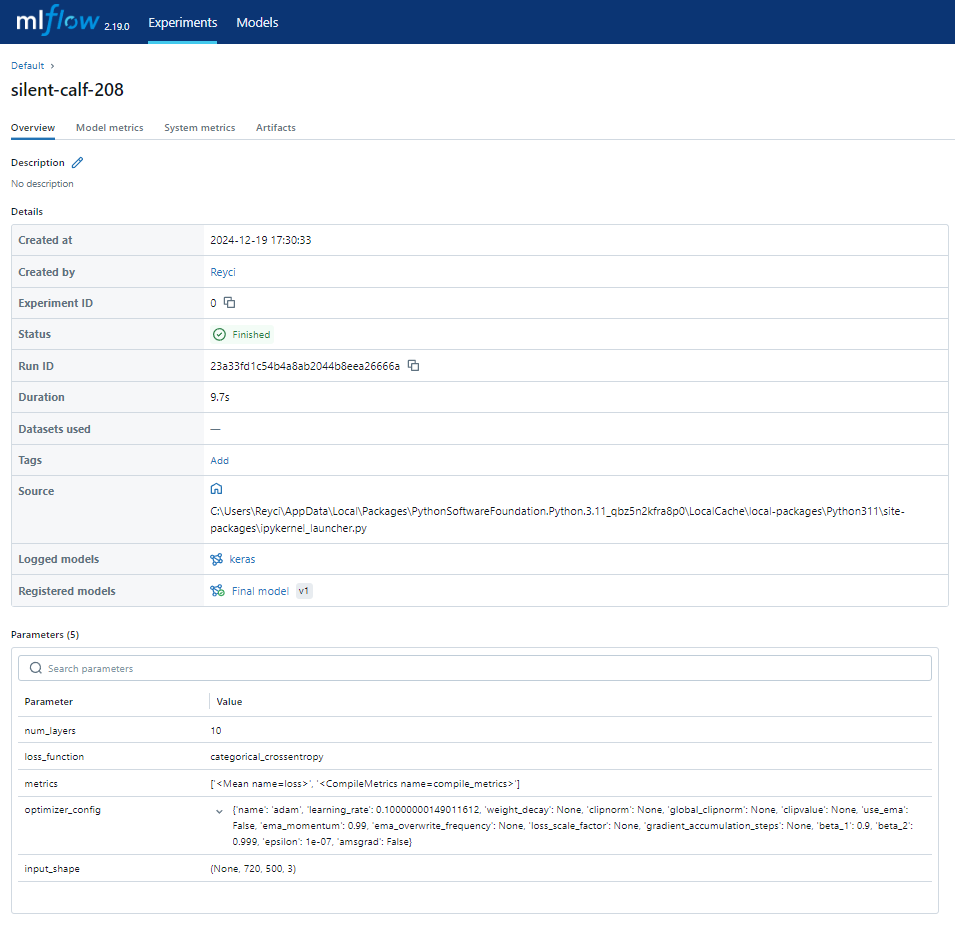

#### Artefactos asociados (hiperparámetros)

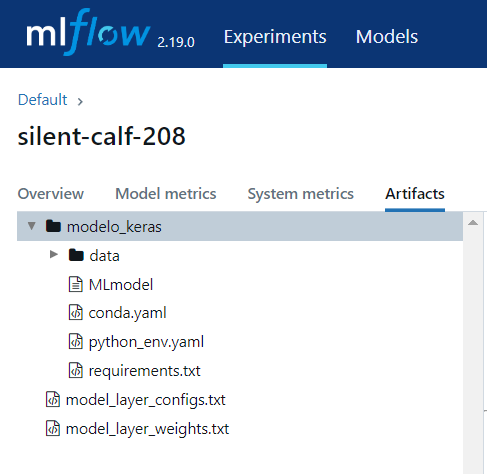

### Total de experimentos realizados

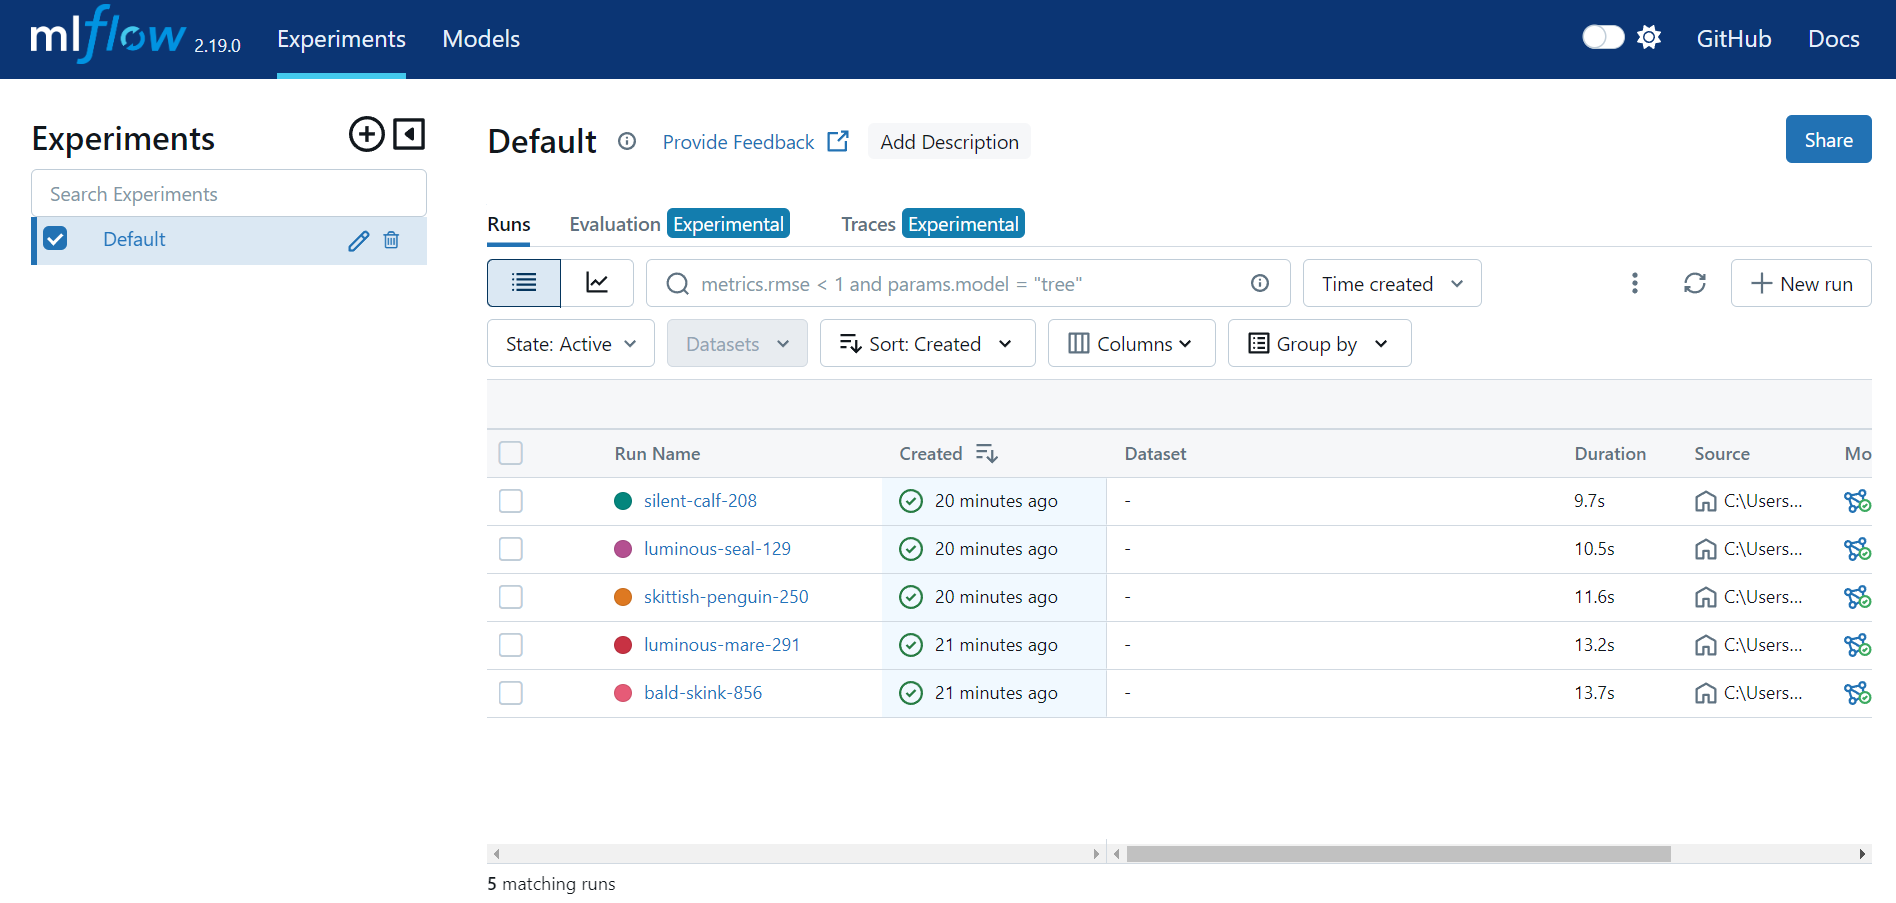

### Registro y versionamiento de modelos

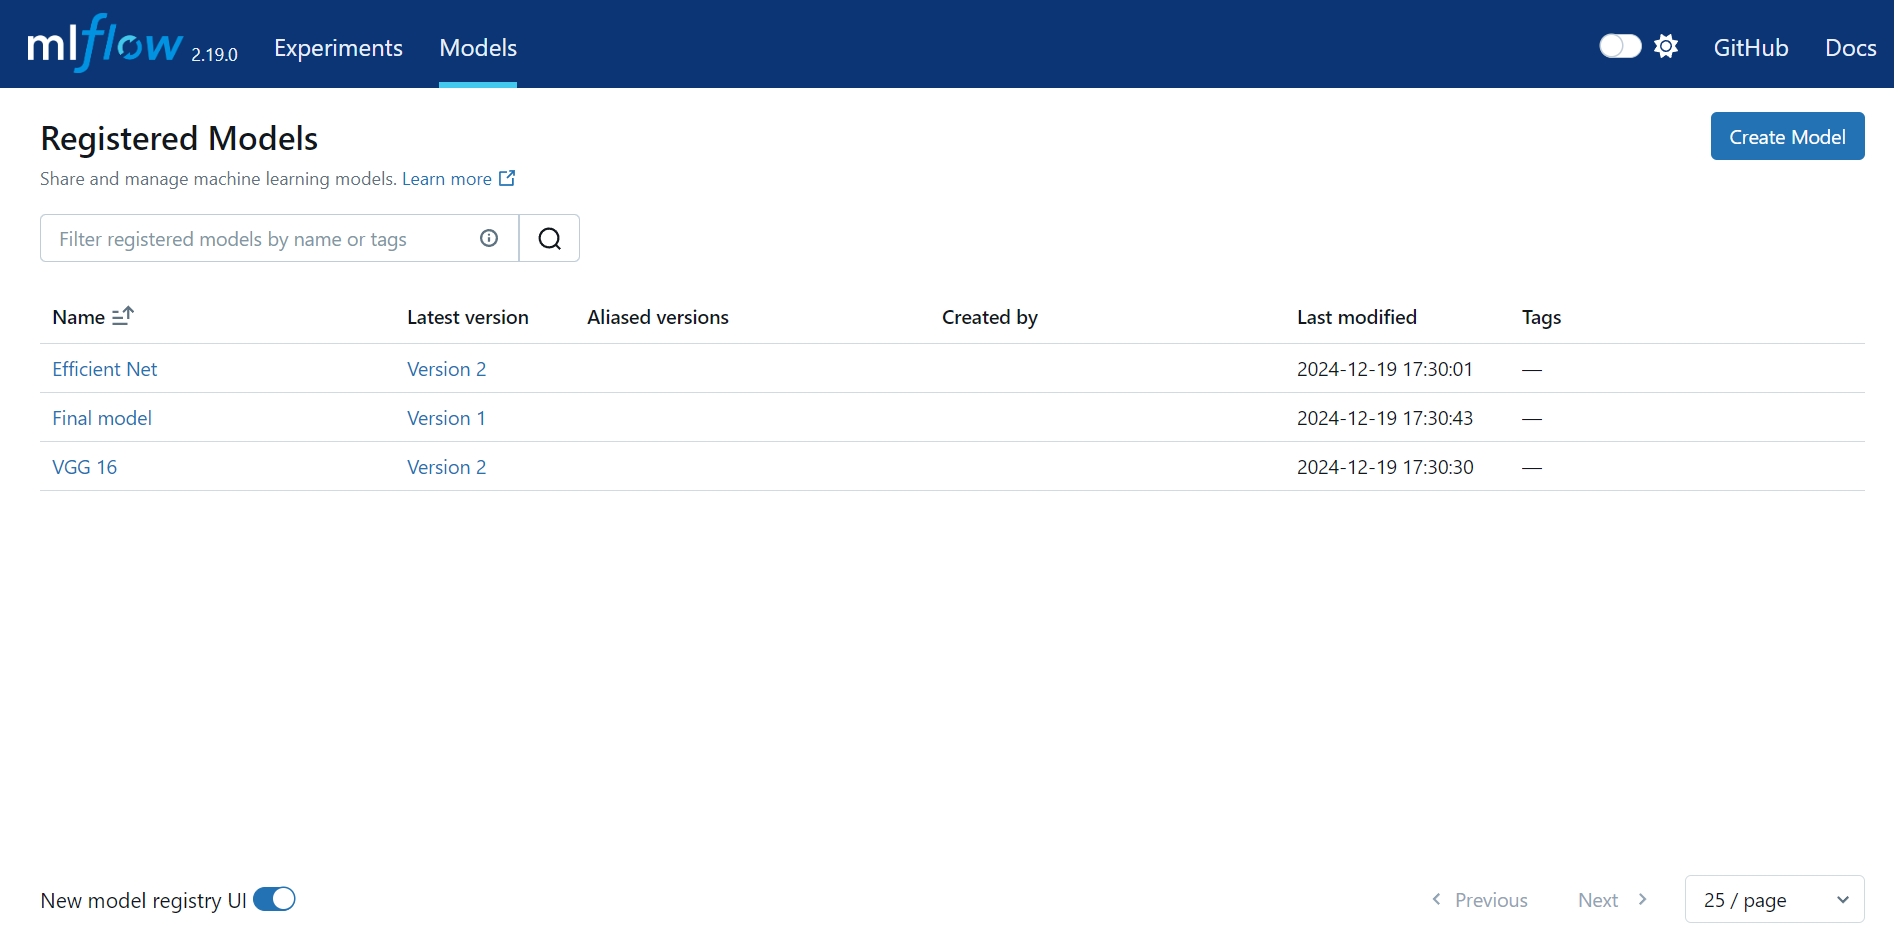
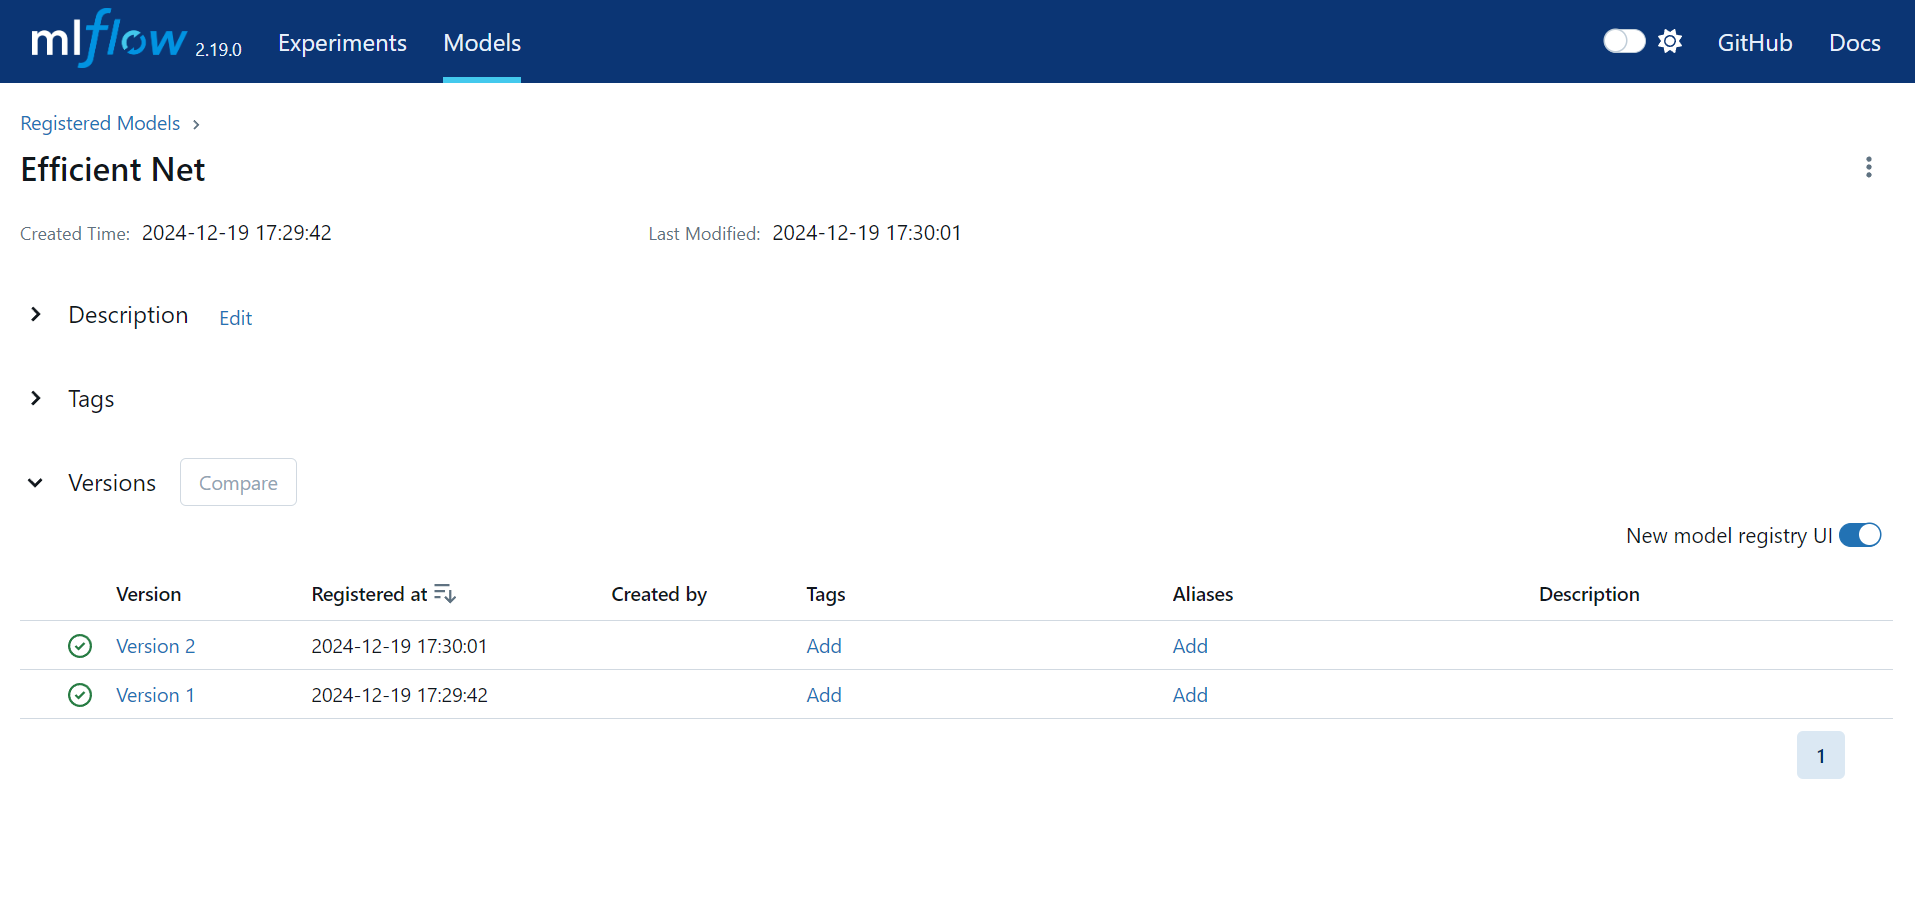
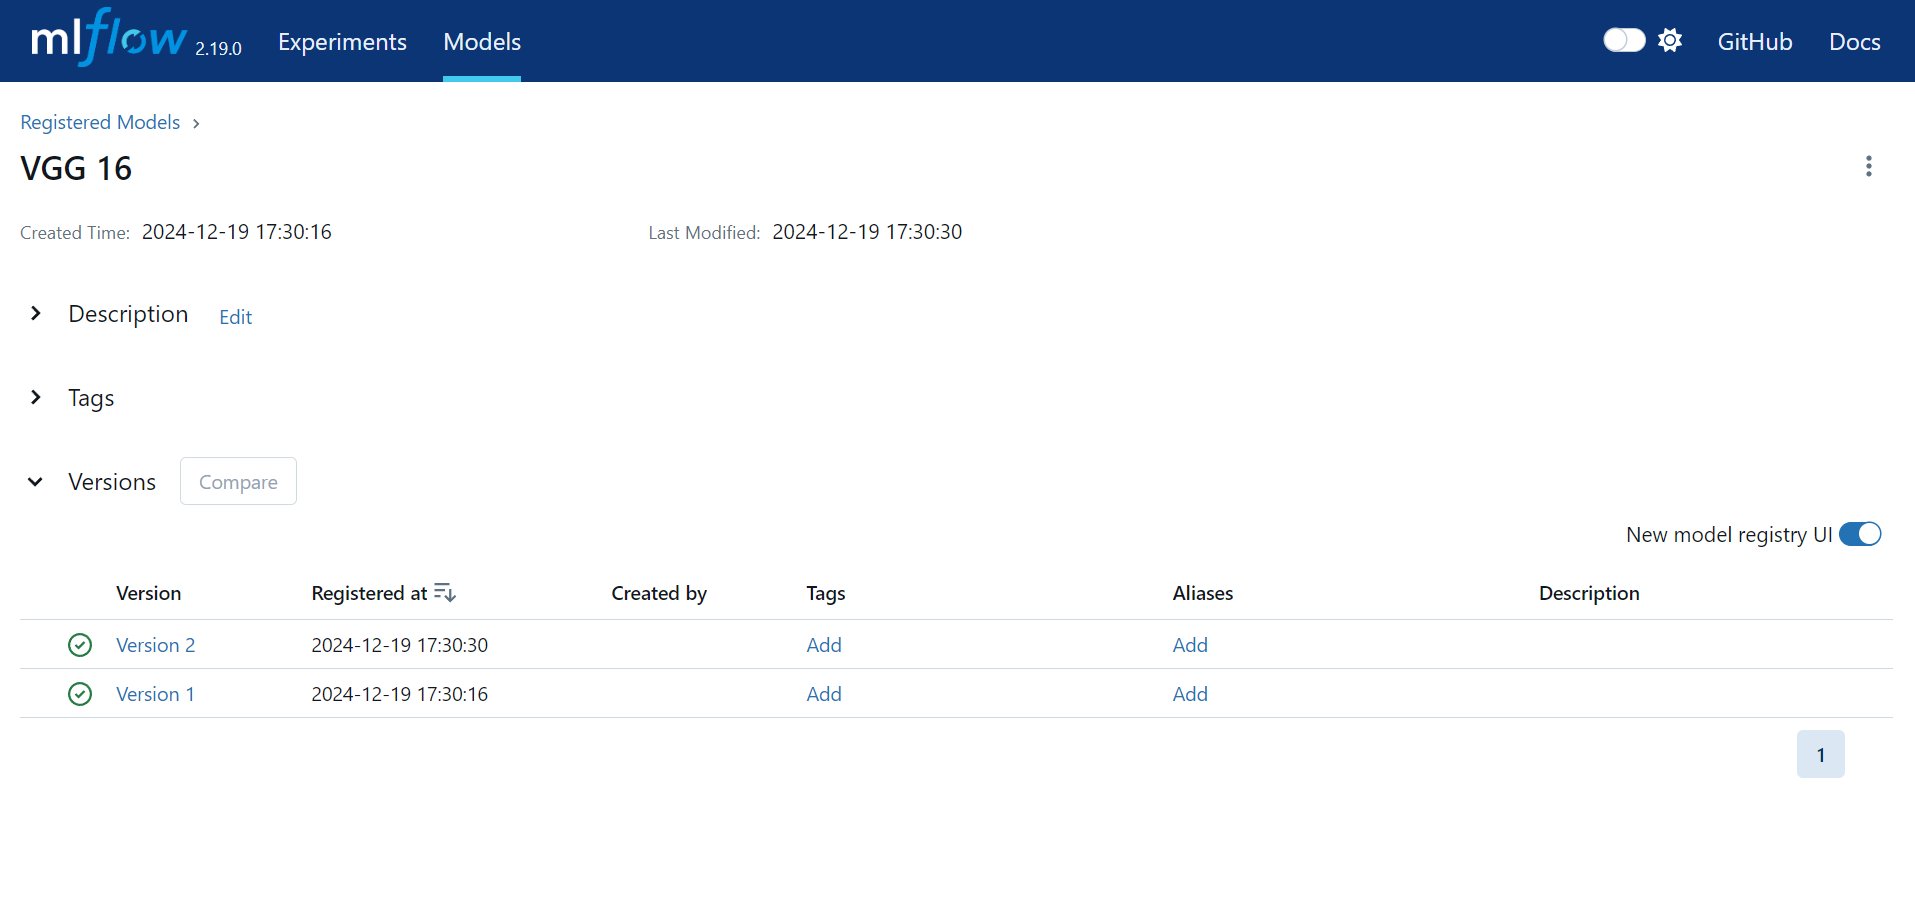
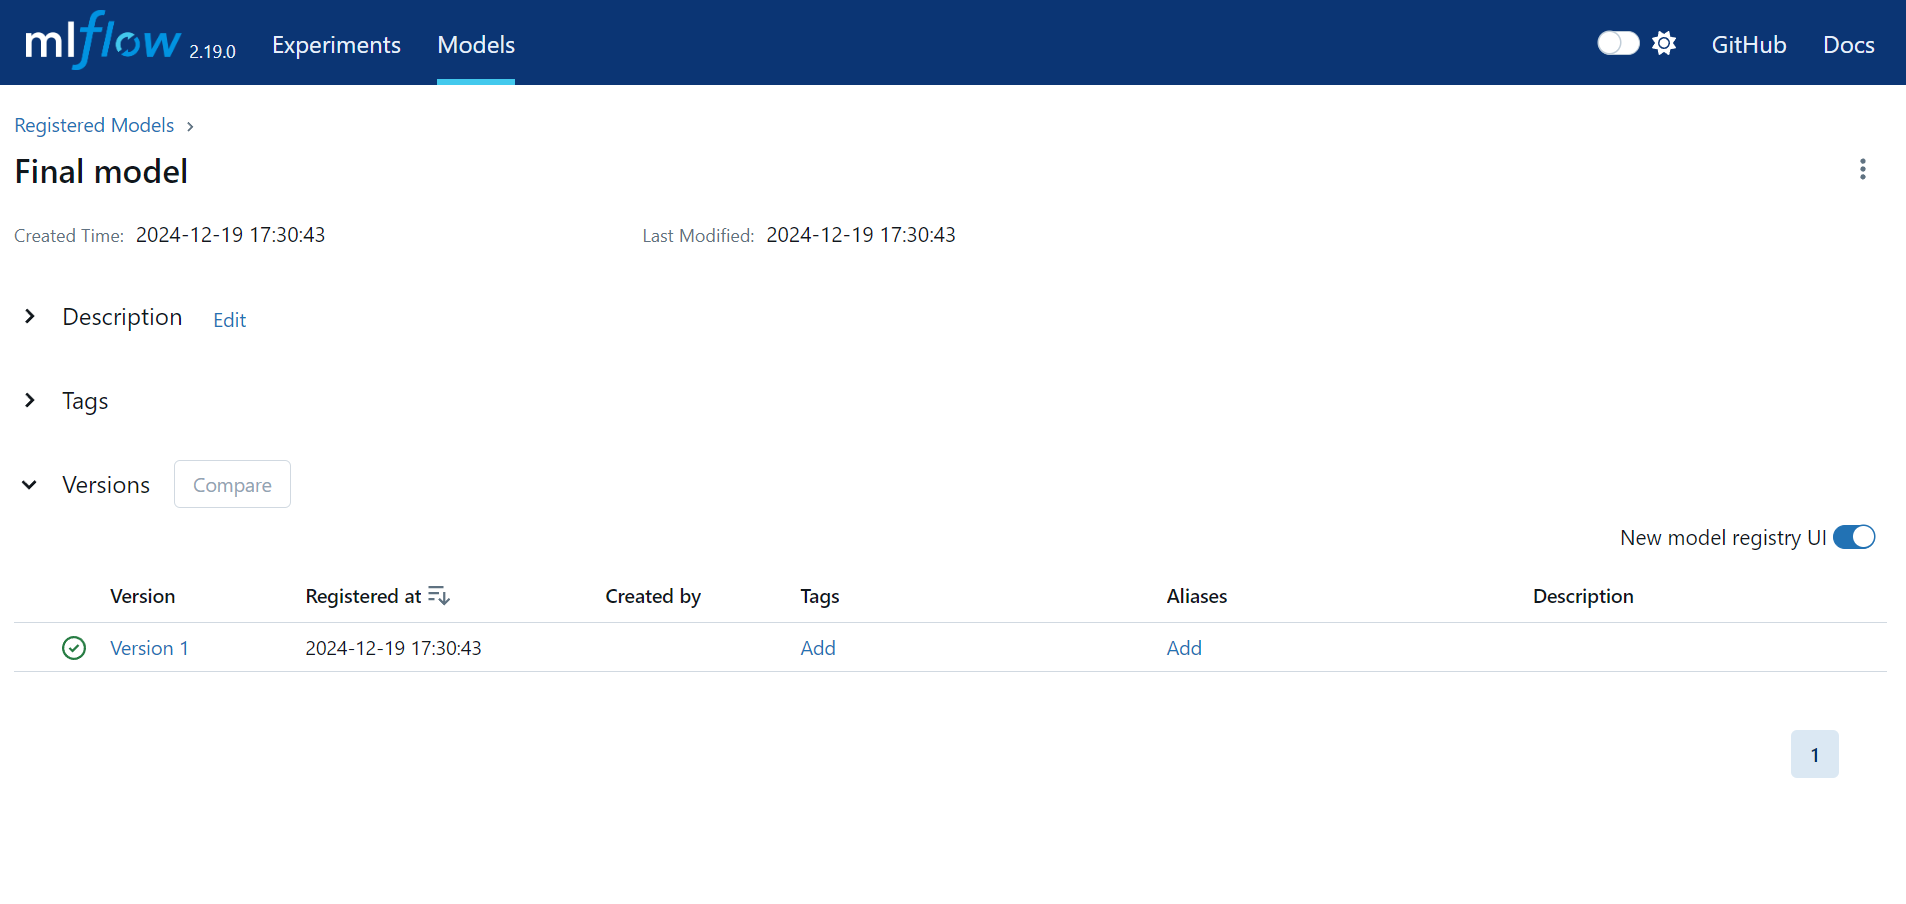
